# GRIP@ The Spark FOundation 

# Task 2: Prediction using unsupervised learning

# By: Arpita Bajaj

# Objective: To predict the optimum number of clustersand represent it visually from the given 'Iris dataset'

In [1]:
#Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [6]:
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
#checking the shape of dataset

In [9]:
df.shape

(150, 4)

In [10]:
#Reading the first 10 observations

In [11]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
#Reading last 10 observations

In [13]:
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [14]:
#Checking numerical data

In [15]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
#Checking the null value in the dataset

In [17]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [18]:
#Plotting feature in line graph

<AxesSubplot:>

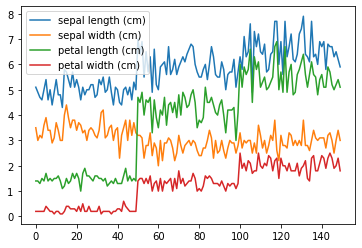

In [19]:
df.plot(kind='line')

In [20]:
#Optimum number of clusters for K-means classification

In [23]:
x=df.iloc[:,[0,1,2,3]].values

In [24]:
#Using elbow method to find the optimum number of clusters

In [25]:
from sklearn.cluster import KMeans

In [31]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [29]:
#Plotting the results on a line graph
#Allowing us to observe the elbow

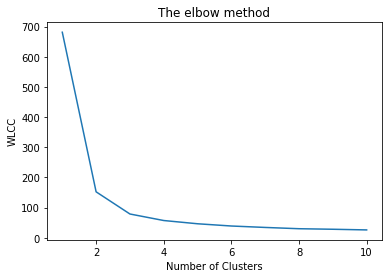

In [32]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WLCC')
plt.show()

# The optimum clusters is where the elbow occurs. This is when within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration.

# The maximum number of clusters that can be formed is 3 as observed from the Elbow Method

In [33]:
#Applying KMeans to the dataset

In [38]:
kmeans=KMeans(n_clusters=3, init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [39]:
#Printing y_kmeans

In [40]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [42]:
#Visualizing the cluster

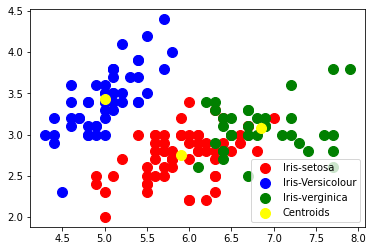

In [44]:
#On the first two columns
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label='Iris-Versicolour')
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='green',label='Iris-verginica')

#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()

# Conclusion: The optimum number of cluster is 3 in the Iris Dataset and the visualisation is shown

# Thank you